# Import ALL the libraries!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, GridSearchCV, RepeatedStratifiedKFold, LeaveOneOut, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Dropping the useless id column

In [3]:
df.drop('id', axis = 1, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.groupby('stroke').size()

stroke
0    4861
1     249
dtype: int64

## Fill missing values of BMI

In [7]:
df.fillna(df['bmi'].mean(), inplace = True)

# Visualisation (not complete!)

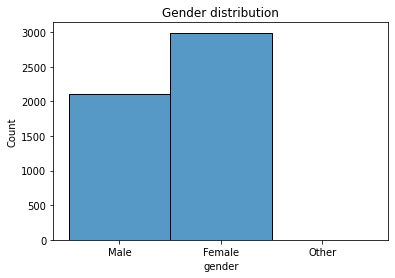

In [8]:
plt.title('Gender distribution')
# sns.set(rc={'figure.figsize':(10, 4)})
sns.histplot(data = df, x = 'gender')
plt.show()

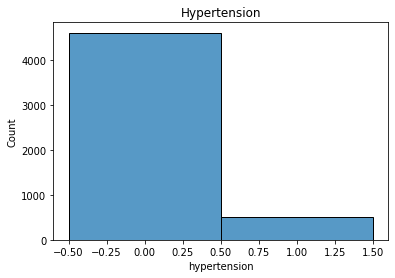

In [9]:
plt.title('Hypertension')
sns.histplot(data = df, x = 'hypertension', binrange = [0, 1], discrete = True, legend = True)
plt.show()

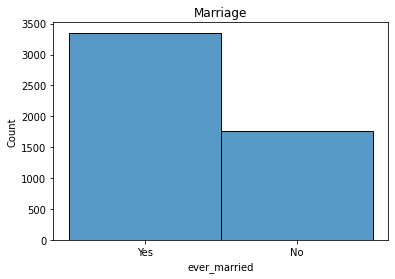

In [10]:
plt.title('Marriage')
sns.histplot(data = df, x = 'ever_married',  binrange = [0, 1], discrete = True, legend = True)
plt.show()

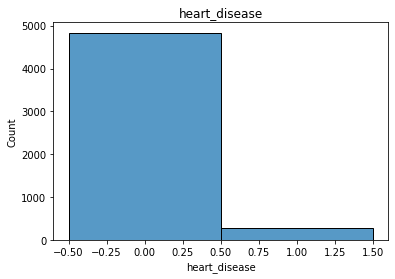

In [11]:
plt.title('heart_disease')
sns.histplot(data = df, x = 'heart_disease', binrange = [0, 1], discrete = True, legend = True)
plt.show()

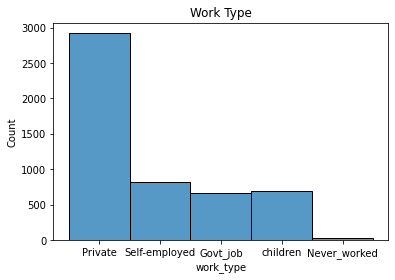

In [12]:
plt.title('Work Type')
sns.histplot(data = df, x = 'work_type', discrete = True, legend = True)
plt.show()

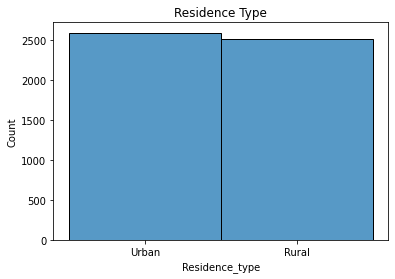

In [13]:
plt.title('Residence Type')
sns.histplot(data = df, x = 'Residence_type', binrange = [0, 1], discrete = True, legend = True)
plt.show()

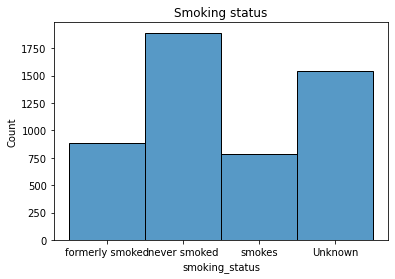

In [14]:
plt.title('Smoking status')
sns.histplot(data = df, x = 'smoking_status', discrete = True, legend = True)
plt.show()

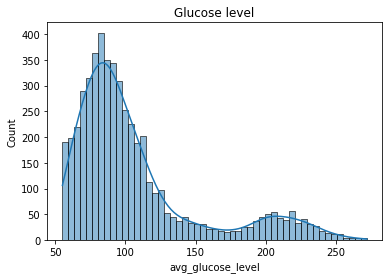

In [15]:
plt.title('Glucose level')
sns.histplot(data = df, x = 'avg_glucose_level', legend = True, kde = True)
plt.show()

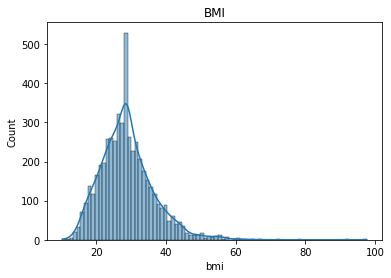

In [16]:
plt.title('BMI')
sns.histplot(data = df, x = 'bmi', legend = True, kde = True)
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='count'>

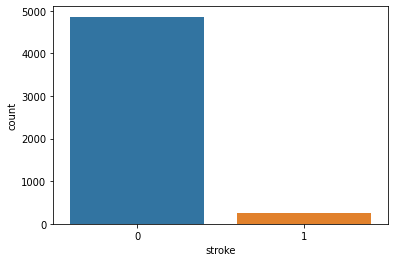

In [17]:
sns.countplot(data = df, x = 'stroke')

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

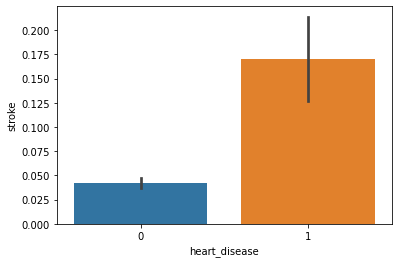

In [18]:
sns.barplot(data = df, x = 'heart_disease', y = 'stroke')

In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Dummy variables

In [20]:
df_dummy = pd.get_dummies(df)
df_dummy

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


<AxesSubplot:>

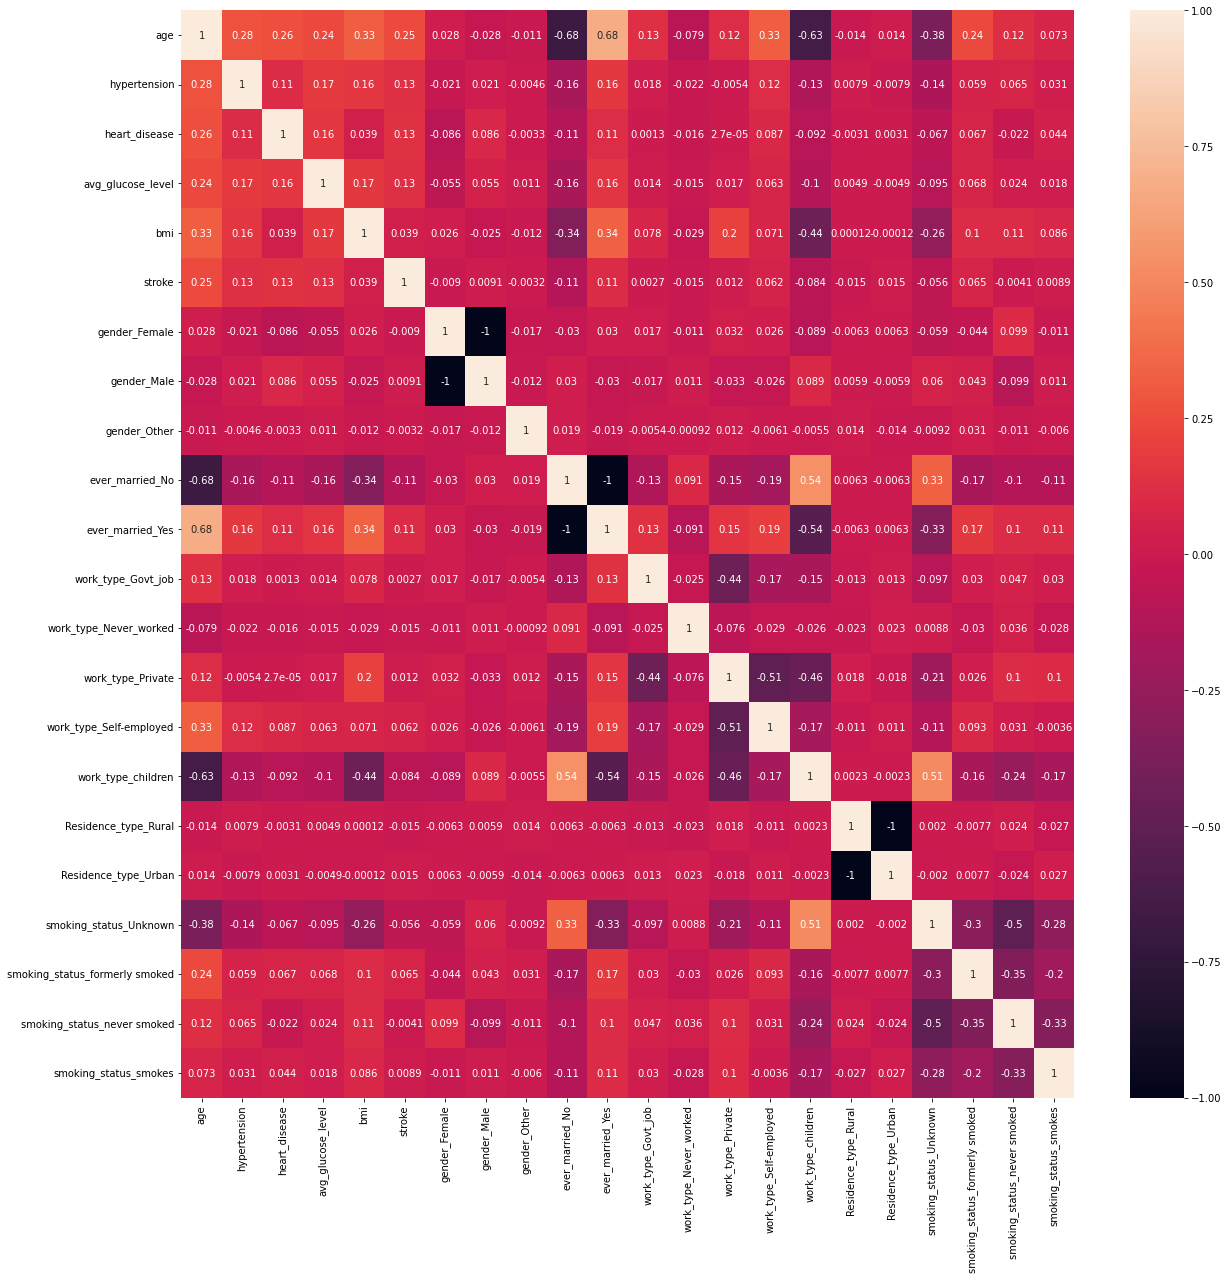

In [21]:
corr = df_dummy.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

## Separating the numerical and categorical features

In [22]:
num_df = df.select_dtypes(exclude = 'object')
cat_df = df.select_dtypes(include = 'object')

In [23]:
num_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [24]:
num_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [25]:
cat_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


### Look at values of categorical columns

In [26]:
for column in cat_df.columns:
    message = f'\n{column} column:'
    print(message)
    print(df[column].value_counts())


gender column:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married column:
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type column:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type column:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status column:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


## Oversampling (done due to class imbalance)

In [27]:
X = df.drop('stroke', axis = 1)
y = df['stroke']

In [28]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

df_new = pd.DataFrame(X_over, columns = df.drop('stroke', axis = 1).columns)
df_new['stroke'] = pd.Series(y_over)

df_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Female,81.0,0,0,Yes,Private,Rural,184.40,27.500000,never smoked,1
9718,Male,64.0,0,1,Yes,Govt_job,Urban,74.10,28.800000,Unknown,1
9719,Female,80.0,0,0,Yes,Private,Urban,73.54,24.000000,Unknown,1
9720,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.700000,never smoked,1


In [29]:
df_new['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

## Replace the 'other' gender with Male

In [30]:
df_new['gender'].replace({"Other" : "Male"}, inplace = True)

In [31]:
X = df_new.drop('stroke', axis = 1)
y = df_new['stroke']

## Train test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, stratify = y
)

## Separate into numerical and categorical features again

In [33]:
num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()
cat_features = X_train.select_dtypes(include = 'object').columns.tolist()

print(num_features)
print(cat_features)


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### Start modelling (SVC was not trained because it took a shit-ton of time)

In [34]:
models = list()
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
# models.append(('SVM', SVC()))

results, names = list(), list()

## Making the pipelines

In [35]:
num_pipe = Pipeline(steps = [
    ('sclaer', StandardScaler())
])

cat_pipe = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

processor = ColumnTransformer(transformers = [
    ('numeric', num_pipe, num_features),
    ('categorical', cat_pipe, cat_features)
])

LR: 0.7869169040443336 (0.009585787636438005)
KNN: 0.933037257613354 (0.004713435065201582)
Decision Tree: 0.9757016915110553 (0.002855165595051588)
Naive Bayes: 0.7340415276931047 (0.003168805341201754)


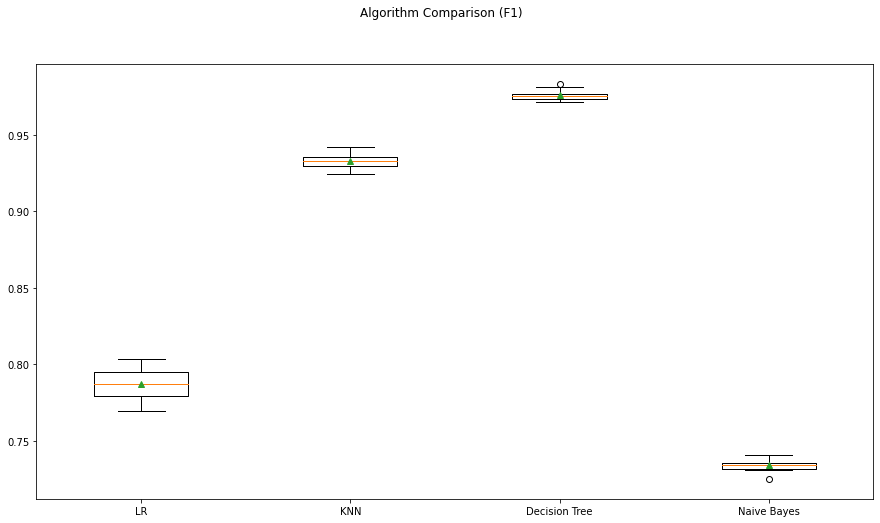

In [36]:
results, names = list(), list()

for name, model in models:
    pipe = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    score = cross_val_score(pipe, X, y, cv = kfold, scoring = 'f1', error_score = 'raise')
    message = f'{name}: {score.mean()} ({score.std()})'
    print(message)
    results.append(score)
    names.append(name)

fig = plt.figure(figsize = (15, 8))
fig.suptitle('Algorithm Comparison (F1)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

LR: 0.7780492346102171 (0.009731680048577575)
KNN: 0.9282043648904544 (0.005403902626348978)
Decision Tree: 0.9743471389126916 (0.0036323975141290634)
Naive Bayes: 0.6415346514752399 (0.005578594456405048)


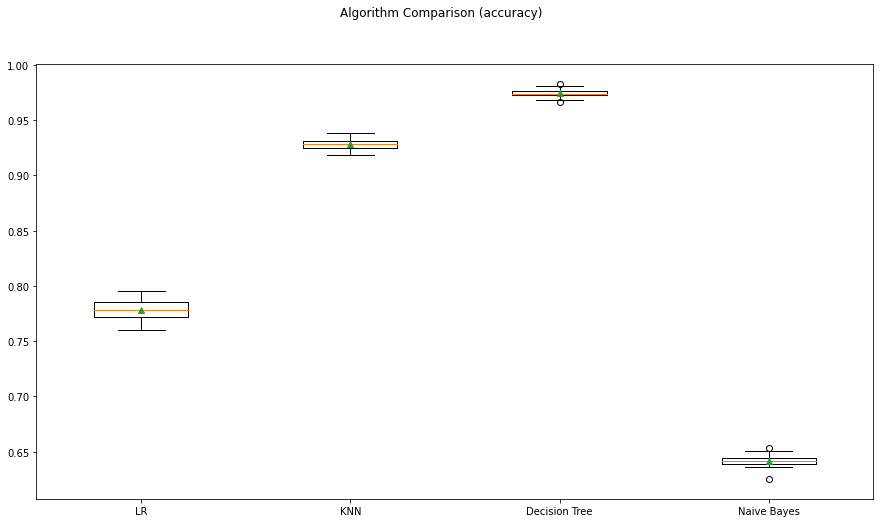

In [37]:
results, names = list(), list()

for name, model in models:
    pipe = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    score = cross_val_score(pipe, X, y, cv = kfold, scoring = 'accuracy', error_score = 'raise')
    message = f'{name}: {score.mean()} ({score.std()})'
    print(message)
    results.append(score)
    names.append(name)

fig = plt.figure(figsize = (15, 8))
fig.suptitle('Algorithm Comparison (accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

LR: 0.8443337129891098 (0.009342431486296278)
KNN: 0.9719401833030931 (0.004323980426788163)
Decision Tree: 0.9748199112667537 (0.0027818582323469857)
Naive Bayes: 0.7958869830127145 (0.010735493953377003)


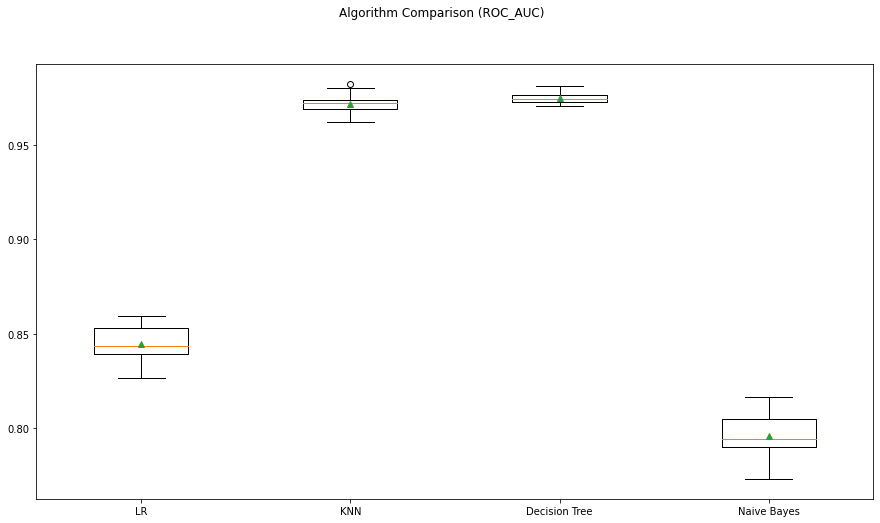

In [38]:
results, names = list(), list()

for name, model in models:
    pipe = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    score = cross_val_score(pipe, X, y, cv = kfold, scoring = 'roc_auc', error_score = 'raise')
    message = f'{name}: {score.mean()} ({score.std()})'
    print(message)
    results.append(score)
    names.append(name)

fig = plt.figure(figsize = (15, 8))
fig.suptitle('Algorithm Comparison (ROC_AUC)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

ADA: 0.7940341701312852 (0.007545294023358342)
GB: 0.8494339924042866 (0.009308508939854881)
RF: 0.9908456843018396 (0.0018333745943911392)
XGB: 0.9737708168036646 (0.00333001839162288)


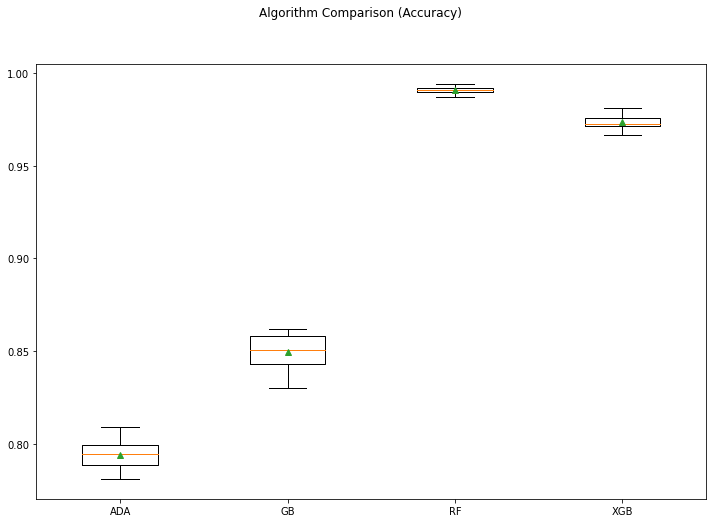

In [39]:
models2 = list()
models2.append(('ADA', AdaBoostClassifier()))
models2.append(('GB', GradientBoostingClassifier()))
models2.append(('RF', RandomForestClassifier()))
models2.append(('XGB', XGBClassifier(verbosity = 0)))

results, names = list(), list()

for name, model in models2:
    pipeline = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10, shuffle = True, random_state = 1234)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    result = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = kfold)
    results.append(result)
    names.append(name)
    message = f'{name}: {result.mean()} ({result.std()})'
    print(message)

fig = plt.figure(figsize = (12, 8))
fig.suptitle('Algorithm Comparison (Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

ADA: 0.8067144593280479 (0.006300714533613584)
GB: 0.8588061938009959 (0.008606006555470407)
RF: 0.9905085270923535 (0.0019827997793305)
XGB: 0.9744516320745845 (0.003163488454935915)


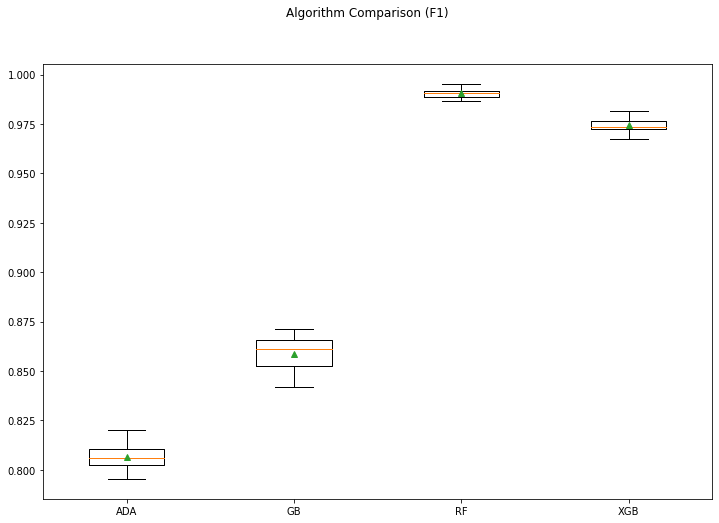

In [40]:
models2 = list()
models2.append(('ADA', AdaBoostClassifier()))
models2.append(('GB', GradientBoostingClassifier()))
models2.append(('RF', RandomForestClassifier()))
models2.append(('XGB', XGBClassifier(verbosity = 0)))

results, names = list(), list()

for name, model in models2:
    pipeline = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10, shuffle = True, random_state = 1234)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    result = cross_val_score(pipeline, X, y, scoring = 'f1', cv = kfold)
    results.append(result)
    names.append(name)
    message = f'{name}: {result.mean()} ({result.std()})'
    print(message)

fig = plt.figure(figsize = (12, 8))
fig.suptitle('Algorithm Comparison (F1)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

ADA: 0.8688860540892084 (0.008400558611930535)
GB: 0.92316037550346 (0.0076512397395039206)
RF: 1.0 (4.4408920985006264e-17)
XGB: 0.9977380864485584 (0.0010945077103754535)


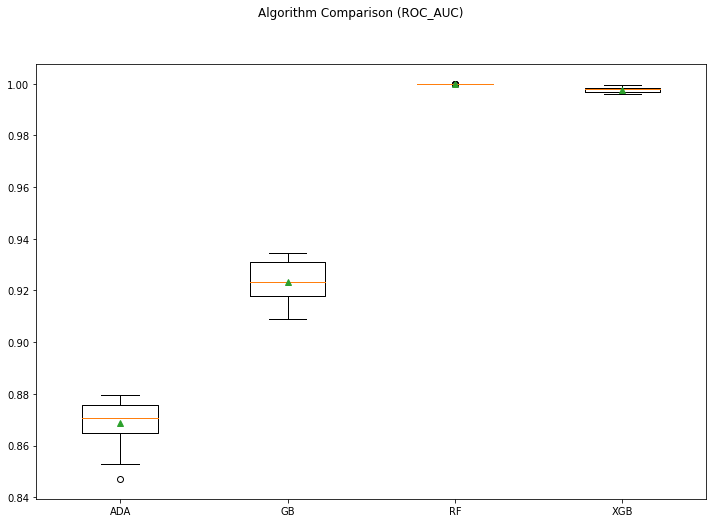

In [41]:
models2 = list()
models2.append(('ADA', AdaBoostClassifier()))
models2.append(('GB', GradientBoostingClassifier()))
models2.append(('RF', RandomForestClassifier()))
models2.append(('XGB', XGBClassifier(verbosity = 0)))

results, names = list(), list()

for name, model in models2:
    pipeline = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])
    # kfold = KFold(n_splits = 10, shuffle = True, random_state = 1234)
    kfold = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state=31415)
    result = cross_val_score(pipeline, X, y, scoring = 'roc_auc', cv = kfold)
    results.append(result)
    names.append(name)
    message = f'{name}: {result.mean()} ({result.std()})'
    print(message)

fig = plt.figure(figsize = (12, 8))
fig.suptitle('Algorithm Comparison (ROC_AUC)')
ax = fig.add_subplot(111)
plt.boxplot(results, labels = names, showmeans = True)
ax.set_xticklabels(names)
plt.show()

## Finalise the model: RF

In [45]:
final_model = Pipeline(steps = [
    ('processor', processor),
    ('model', RandomForestClassifier())
])
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)

0.9897164225615457


## Making a random prediction

In [75]:
test = [['Male', 88, 1, 1, 'Yes', 'Private', 'Urban', 222.22, 36.23, 'smokes']]
dummy = pd.DataFrame(test, columns = df.drop('stroke', axis = 1).columns)

In [76]:
dummy

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,88,1,1,Yes,Private,Urban,222.22,36.23,smokes


## Display final prediction

In [77]:
answer = final_model.predict(dummy)
print(answer[0])

1


### Probability of the prediction being correct

In [78]:
predictions = final_model.predict_proba(dummy)
print(predictions[0][answer[0]])

0.76
